<a href="https://colab.research.google.com/github/qnhhoa/MachineLearning/blob/main/Da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libaries, Packages và Set Dataset Path

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import seaborn as sns

%matplotlib inline

In [6]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/nghoanglong/bank-customer-churn/main/data/raw_data.csv'
DATASET_DIR_PATH = '/content/drive/MyDrive/Colab Notebooks/Project'# [directory path] để save dataset trên google drive
DATASET_PATH = os.path.join(DATASET_DIR_PATH, 'customer_churn_raw.csv')

# Download and save dataset

In [7]:
def fetch_data(download_url, dataset_path):
    try:
        urllib.request.urlretrieve(download_url, dataset_path)
    except:
        print(f"failed to download and save dataset in {dataset_path}")

In [8]:
fetch_data(DOWNLOAD_URL, DATASET_PATH)

# Data Preprocessing

In [9]:
# load dataset
df = pd.read_csv(DATASET_PATH)

In [10]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df.copy()

## EDA - Exploratory Data Analysis

Những thông tin cần biết từ dữ liệu:

1. Dữ liệu bao gồm bao nhiêu hàng, cột?
2. Phân bố dữ liệu của từng feature như thế nào?
3. Tên của các cột đã dể hiểu hay chưa?
4. Phân loại các biến continous và categorical
5. Dữ liệu có chứa NaN hay không?
6. Kiểm tra Outliners?

### Xem thông tin dữ liệu

In [11]:
# kiểm tra 5 dòng đầu
df_cp.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df_cp.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


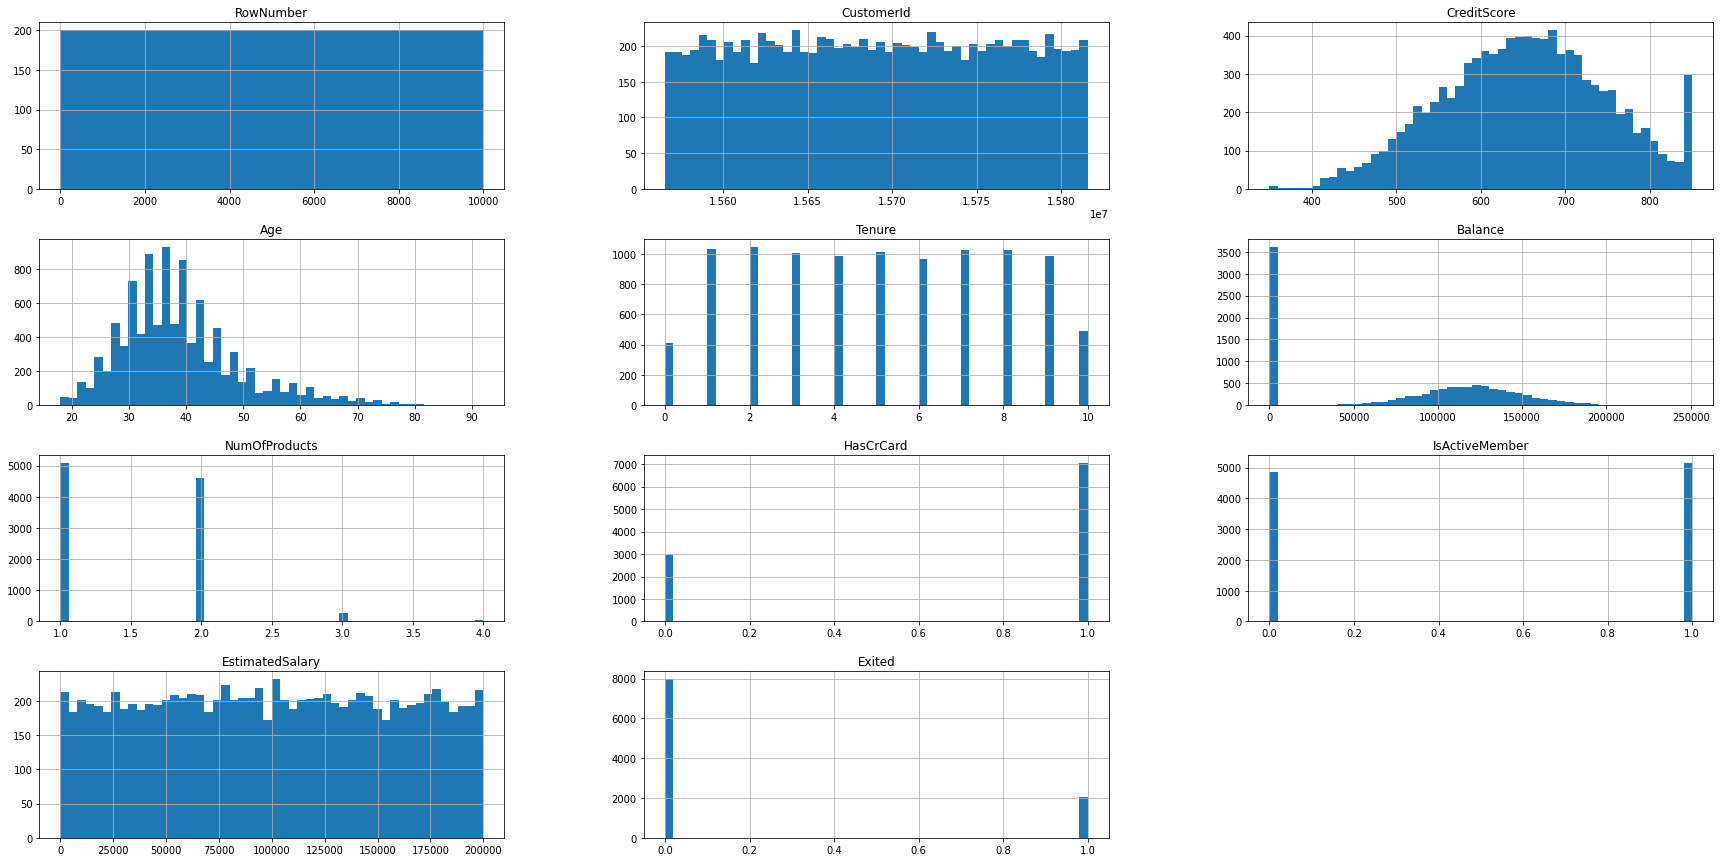

In [14]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(30, 15))
plt.show()

### Kiểm tra giá trị NaN của các features

In [15]:
# check dữ liệu NaN
missing_data = df_cp.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]

In [16]:
missing_data

,features,total_missing
0,RowNumber,0
1,CustomerId,0
2,Surname,0
3,CreditScore,0
4,Geography,0
5,Gender,0
6,Age,0
7,Tenure,0
8,Balance,0
9,NumOfProducts,0


### Kiểm tra Outliers

In [17]:
# Lấy ra những cột dạng numeric trong data
numeric = df_cp.select_dtypes(exclude='object')

In [18]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['RowNumber', 'CustomerId', 'Exited']]
cols_to_check

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

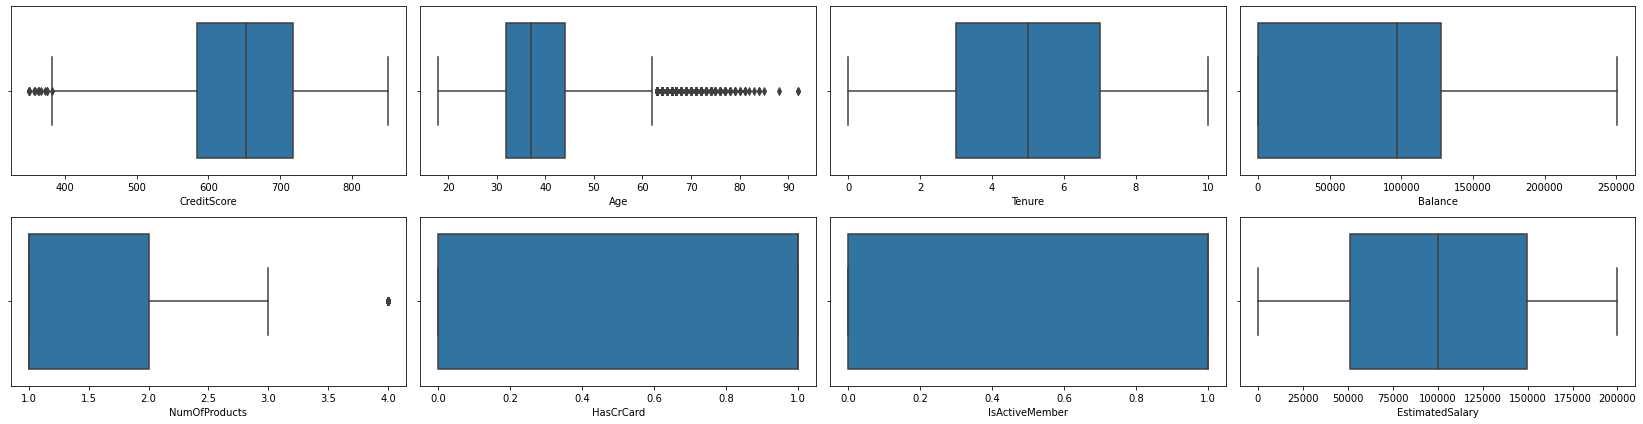

In [19]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(2, 4, figsize = (23, 6))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

### Kết luận

**Dữ liệu bao gồm:** 10000 recors, 14 features

**Tên của các features:** Dễ hiểu, không cần thực hiện thay đổi

**Dữ liệu của các features:** Cần thực hiện thay đổi
1. Geography cần thực hiện encode sang dạng numerical
2. Gender cần thực hiện encode sang dạng numerical

**Ta phân loại được:**

*   **Categorical features:** Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember,
*   **Numerical features:** CreditScore, Balance, EstimatedSalary
*   **Discrete features:** Surname, Age
*   **Label:** Exited
*   **Unnecessary columns:** RowNumber, CustomerId

**NaN data:** Các features không chứa NaN data

**Ouliers:** 
1. **CreditScore (Mức tín dụng của khách hàng):** feature chứa outliers nằm trong khoảng [350, 380]
2. **Age (Tuổi của khách hàng):** feature chứa outliers nằm trong khoảng [63, 92]
3. **NumOfProducts (Số dịch vụ khách hàng đã sử dụng):** feature chứa outliers ở điểm 4.0


## Data Cleaning
**Mục tiêu:**


1. Vì các features và kiểu dữ liệu đã chuẩn theo mong muốn -> Không thực hiện xử lý
2. Vì các features không chứa NaN data -> Không thực hiện xử lý
3. Xử lý các Outliers: Sử dụng **IQR (Interquartile Range)**


### Xử lý Outliers sử dụng IQR

In [20]:
# outlier columns
outlier_cols = ["CreditScore", "Age", "NumOfProducts"]

def outlier_thresholds(dataframe, variable):
    Q1 = df_cp[variable].quantile(0.25)
    Q3 = df_cp[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [21]:
df_cp = HandleOutliers(df_cp)

CreditScore has 15 outliers
Age has 359 outliers
NumOfProducts has 58 outliers


In [22]:
# result
df_cp

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Feature Engineering
Mục tiêu:
1. Encode các features dạng text về numerical
2. Feature selection
  *   Sử dụng Chi-squared để kiểm tra mối tương quan giữa input features (categorical) và label (categorical)
  *   Sử dụng Anova F-test để kiểm định mối tương quan giữa input features (continous) và label (categorical)
  *   Ta có thể trực tiếp loại bỏ các features [RowNumber,	CustomerId,	Surname] vì nhận thấy không có mối tương quan giữa những features này với label
3. Apply Data Scaling

### Encode features

In [23]:
# check giá trị Geography feature
df_cp["Geography"].value_counts()

France     4798
Germany    2398
Spain      2372
Name: Geography, dtype: int64

In [24]:
# check giá trị Gender feature
df_cp["Gender"].value_counts()

Male      5236
Female    4332
Name: Gender, dtype: int64

Ta thấy được, với
1. Geography feature có 3 giá trị [France, Germany, Spain] -> tiến hành encode feature này về dạng numerical sử dụng One-Hot Encoding
2. Gender feature có 2 giá trị [Male, Female] -> tiến hành encode feature này về dạng numerical với giá trị lần lượt [0, 1]

In [25]:
from sklearn.preprocessing import OneHotEncoder

# encoder column
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Geography']]).toarray())
encoder_df.columns = df_cp["Geography"].unique()

# join to original df
df_cp = df_cp.join(encoder_df)

In [26]:
df_cp['Gender'] = df_cp["Gender"].map({value:idx for idx, value in enumerate(df_cp["Gender"].value_counts().index)})

In [27]:
# results
df_cp.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,1.0,0.0,0.0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,1.0,0.0,0.0
10,11,15767821,Bearce,528,France,0,31,6,102016.72,2,0,0,80181.12,0,1.0,0.0,0.0


### Feature Selection

#### Chi-square test
Đặt giả thuyết:

*   Null hypothesis (H0) : output feature không phụ thuộc input feature
*   Alternate hypothesis (H1): output feature có phụ thuộc input feature

Nếu ta chấp nhận giả thuyết H0, tức label không phụ thuộc vào input feature đang xét và ngược lại

Mức alpha xét = 0.05

**Mục tiêu:** lấy ra được những feature có tác động tới output

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
categorical_features = df_cp[["France", "Spain", "Germany", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "Age"]]

In [30]:
best_features = SelectKBest(chi2, k=9)
best_features.fit(categorical_features, df_cp["Exited"])

SelectKBest(k=9, score_func=<function chi2 at 0x7f3ee81a8a70>)

In [31]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["France", "Spain", "Germany", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "Age"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
8,0.000000e+00,2447.451698,Age
1,4.551479e-48,212.198841,Spain
7,1.535910e-23,99.984544,IsActiveMember
3,4.419432e-14,56.972525,Gender
0,5.043699e-13,52.187860,France
5,1.848108e-06,22.746809,NumOfProducts
2,1.229781e-05,19.116484,Germany
4,7.549423e-02,3.159328,Tenure
6,6.806320e-01,0.169415,HasCrCard


In [32]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0            France
1             Spain
2           Germany
3            Gender
5     NumOfProducts
7    IsActiveMember
8               Age
Name: columns, dtype: object

#### Anova F-test
Đặt giả thuyết:

*   Null hypothesis (H0) : 2 groups có cùng phương sai
*   Alternate hypothesis (H1): 2 groups có phương sai khác nhau

Nếu ta chấp nhận giả thuyết H0, tức input feature hiện tại không ảnh hưởng tới label và ngược lại

Mức alpha xét = 0.05

**Mục tiêu:** lấy ra được những feature có tác động tới output

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
continous_features = df_cp[["CreditScore", "Balance", "EstimatedSalary"]]

In [35]:
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df_cp["Exited"])

SelectKBest(k=3)

In [36]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["CreditScore", "Balance", "EstimatedSalary"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
1,1.470548e-29,128.323591,Balance
0,8.426616e-02,2.981256,CreditScore
2,4.008481e-01,0.705844,EstimatedSalary


In [37]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

1    Balance
Name: columns, dtype: object

#### Kết luận
Vậy ta chọn được những features sau:
1. input: [France, Spain, Germany, Gender,  NumOfProducts, IsActiveMember, Age, Balance]
2. output: Exited

### Data Scaling
Mục tiêu: Apply Data Normalization lên các continous features [Age, Balance]

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
cols_to_scale = ["Age", "Balance"]
scaler = MinMaxScaler()
df_cp[cols_to_scale] = scaler.fit_transform(df_cp[cols_to_scale])

In [40]:
# result
df_cp[cols_to_scale]

,Age,Balance
0,0.545455,0.000000
1,0.522727,0.334031
2,0.545455,0.636357
3,0.477273,0.000000
4,0.568182,0.500246
...,...,...
9995,0.477273,0.000000
9996,0.386364,0.228657
9997,0.409091,0.000000
9998,0.545455,0.299226


### Final Result

In [41]:
input = df_cp[["France", "Spain", "Germany", "Gender", "NumOfProducts", "IsActiveMember", "Age", "Balance"]].to_numpy()

In [42]:
input.shape

(9568, 8)

In [43]:
y = df_cp["Exited"].to_numpy()

In [44]:
y.shape

(9568,)

# Xây dựng mô hình

In [45]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
sns.set(font_scale=1.8)

## Logistic Regression

In [47]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1710)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)

In [50]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8265412748171369
              precision    recall  f1-score   support

       leave       0.84      0.96      0.90      1536
        stay       0.65      0.27      0.38       378

    accuracy                           0.83      1914
   macro avg       0.74      0.62      0.64      1914
weighted avg       0.80      0.83      0.80      1914



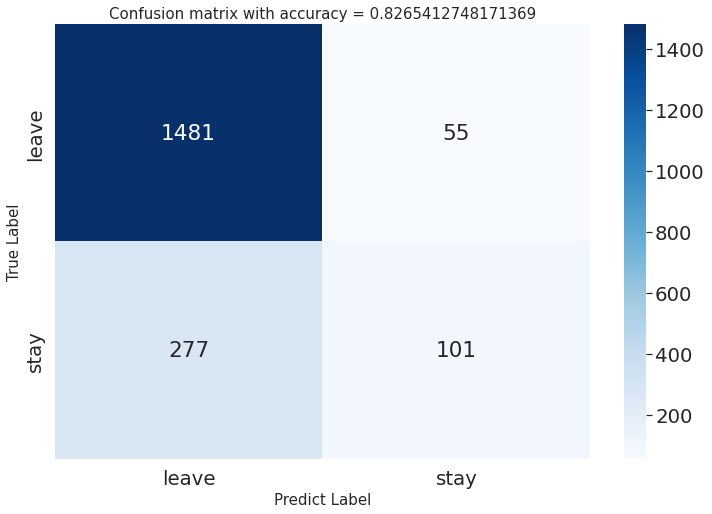

In [51]:
logreg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(logreg_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## Decision Trees

In [52]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1711)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [53]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = clf_gini.predict(X_test)

In [55]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8087774294670846
              precision    recall  f1-score   support

       leave       0.87      0.90      0.88      1536
        stay       0.52      0.46      0.48       378

    accuracy                           0.81      1914
   macro avg       0.69      0.68      0.68      1914
weighted avg       0.80      0.81      0.80      1914



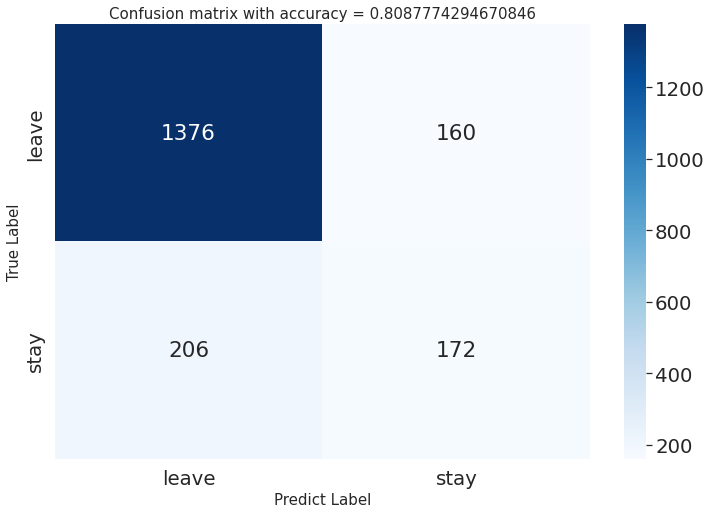

In [56]:
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(dt_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## XGBoost

In [57]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1712)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [58]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier()

In [59]:
y_pred = xgb_classifier.predict(X_test)

In [60]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8636363636363636
              precision    recall  f1-score   support

       leave       0.88      0.96      0.92      1536
        stay       0.74      0.47      0.58       378

    accuracy                           0.86      1914
   macro avg       0.81      0.72      0.75      1914
weighted avg       0.85      0.86      0.85      1914



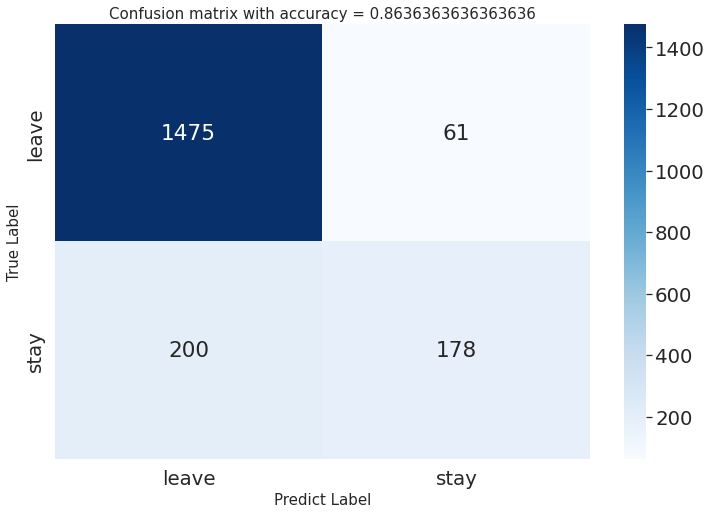

In [61]:
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(xgb_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

# Optimize Models

Ở bước EDA, ta thấy cột **label (Exited)** có hiện tượng imbalance, ta sẽ thử khắc phục vấn đề này sử dụng **Oversampling** và đánh giá kết quả trên 3 models đã sử dụng

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
X = df_cp[["France", "Spain", "Germany", "Gender", "NumOfProducts", "IsActiveMember", "Age", "Balance"]]
y = df_cp["Exited"]

In [64]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [65]:
# check giá trị sau khi oversampling
y_sm.value_counts()

1    7677
0    7677
Name: Exited, dtype: int64

In [66]:
input = X_sm.to_numpy()
y = y_sm.to_numpy()

In [67]:
y.shape

(15354,)

## Logistic Regression

In [68]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1713)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [69]:
logreg = LogisticRegression()
parameters = [{'C':[0.001, 0.01, 0.1, 1.0, 10.0], 
               'solver':['sag', 'liblinear', 'lbfgs']}]

model_lr_grid = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)

In [70]:
model_lr_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'solver': ['sag', 'liblinear', 'lbfgs']}],
             scoring='accuracy')

In [71]:
model_lr_grid.best_params_

{'C': 10.0, 'solver': 'sag'}

In [72]:
y_pred = model_lr_grid.predict(X_test)

In [73]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.7215890589384565
              precision    recall  f1-score   support

       leave       0.71      0.74      0.73      1535
        stay       0.73      0.70      0.72      1536

    accuracy                           0.72      3071
   macro avg       0.72      0.72      0.72      3071
weighted avg       0.72      0.72      0.72      3071



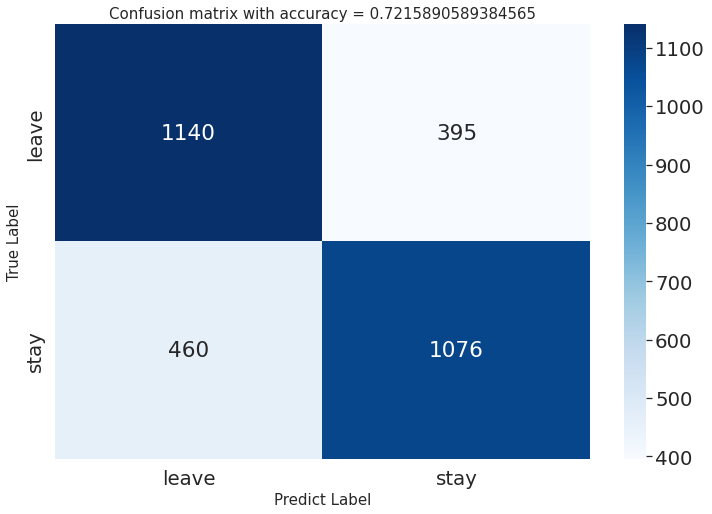

In [74]:
logreg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(logreg_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## Decision Trees

In [75]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1714)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [76]:
clf_gini = DecisionTreeClassifier()
parameters = [{'criterion':['gini', 'entropy'], 'max_depth':[1, 2, 3, 4, 5, 6]}]

model_dt_grid = GridSearchCV(estimator = clf_gini,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)

In [77]:
model_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6]}],
             scoring='accuracy')

In [78]:
model_dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [79]:
y_pred = model_dt_grid.predict(X_test)

In [80]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.7815043959622273
              precision    recall  f1-score   support

       leave       0.79      0.77      0.78      1535
        stay       0.78      0.79      0.78      1536

    accuracy                           0.78      3071
   macro avg       0.78      0.78      0.78      3071
weighted avg       0.78      0.78      0.78      3071



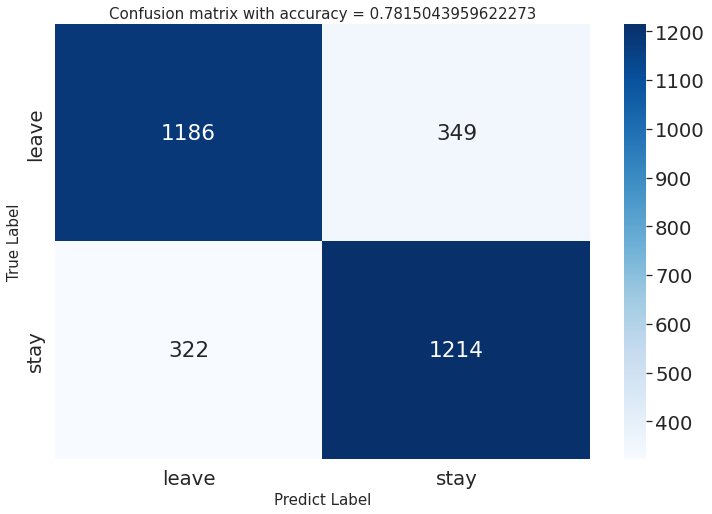

In [81]:
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(dt_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## XGBoost

In [82]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1715)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [83]:
model_xgb= XGBClassifier()
parameters = {'n_estimators':[10, 20, 30, 40, 50, 100, 200],'max_depth':[3, 4, 5, 6],'learning_rate':[0.001, 0.01, 0.1, 0.01]}
model_xgb_grid = GridSearchCV(model_xgb, 
                              parameters,
                              cv=3,
                              verbose=0)

In [84]:
model_xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.01],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 200]})

In [85]:
model_xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [86]:
y_pred = model_xgb_grid.predict(X_test)

In [87]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8941712797134483
              precision    recall  f1-score   support

       leave       0.87      0.92      0.90      1536
        stay       0.92      0.87      0.89      1535

    accuracy                           0.89      3071
   macro avg       0.90      0.89      0.89      3071
weighted avg       0.90      0.89      0.89      3071



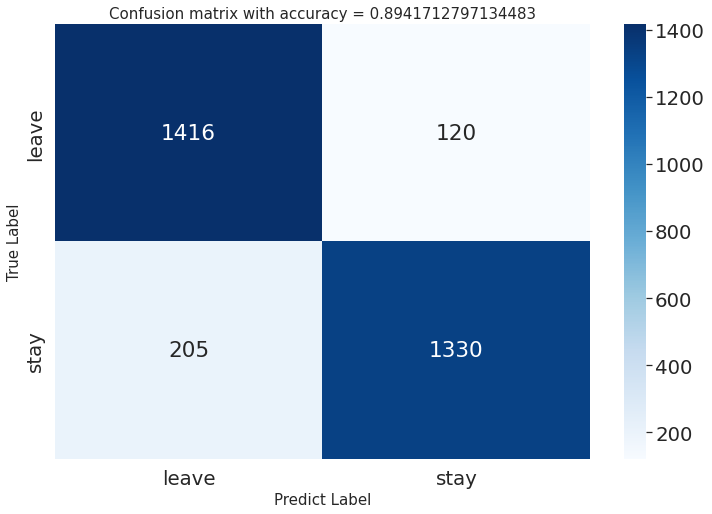

In [88]:
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(xgb_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

In [89]:
# saving model
import pickle
pickle.dump(model_xgb_grid.best_estimator_, open("xgb_model.pkl", "wb"))

# Application

In [90]:
!pip install pydantic
!pip install fastapi
!pip install uvicorn
!pip install colabcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 80 kB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.3 MB 4.7 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 745 kB 43.3 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 428 kB 54.4 MB/s 
     |████████████████████████████████|

In [91]:
from pydantic import BaseModel
from fastapi import FastAPI
from colabcode import ColabCode

In [92]:
cc = ColabCode(port=12000, code=False)

In [93]:
class ITEMS(BaseModel):
    country: str
    gender: str
    numofprods: int
    isactive: int
    age: int
    balance: float

In [94]:
app = FastAPI()
model = pickle.load(open("xgb_model.pkl", "rb"))

@app.get("/")
async def index():
    return {"text": "hello hoang long"}

@app.put("/predict")
async def predict(items: ITEMS):
    if items.gender == "male":
        gender = 0
    else:
        gender = 1
    
    li_ct = {"france": 0, "spain": 0, "germany": 0}
    if items.country in li_ct:
        li_ct[items.country] = 1

    age = (items.age - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
    balance = (items.balance - df["Balance"].min()) / (df["Balance"].max() - df["Balance"].min())

    types = {
        0: "leave",
        1: "stay"
    }
    prediction = list(map(lambda x: types[x], model.predict([li_ct["france"], li_ct["spain"], li_ct["germany"], gender, items.numofprods, items.isactive, age, balance]).tolist()))
    return {"predict": prediction}

In [95]:
!ngrok authtoken 29Jiw4zse9fyhQTqost16CJgRHc_33rG2WxCMejiooaWj3mHB

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
cc.run_app(app=app)